# Librerías

In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['TF_ENABLE_ONEDNN_OPTS'] =  "0"



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## Librerías
import seaborn as sns
import sys
import cv2 as cv2
import glob
from PIL import Image
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import gc
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import os


from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

print(tf.__version__)

2024-07-22 20:07:17.959651: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 20:07:17.959682: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 20:07:17.960038: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-22 20:07:18.086923: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.14.0


In [2]:
## Uso de GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

2024-07-22 20:07:21.541404: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-22 20:07:21.598626: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-22 20:07:21.598794: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Datos

In [3]:
## Obtener todas las rutas de las imágenes en el dataset
ruta = '../Datasets/Micrografías_segmentadas/secas/*/*/*/*.jpg'
rutas_dataset  = glob.glob('../../../Datasets/Micrografías segmentaciones/secas/*/*/*/*.jpg')

## Separar rutas
mask_list = []
image_list = []
for ruta in rutas_dataset:    
    ruta_list = ruta.split('/')       
    clase = ruta_list[6]
    number = ruta_list[7]
    tipo = ruta_list[8]
    name = ruta_list[9].split('.')[0]
    
    if tipo == 'train':
        image_list.append([name,ruta,clase,number])
    elif tipo == 'mask_bin':
        mask_list.append([name,ruta,clase,number])
    else:
        None

mask_pd = pd.DataFrame(mask_list,columns=['name','route_mask','label','number']).sort_values(by='name')
image_pd = pd.DataFrame(image_list,columns=['name','route_image','label','number']).sort_values(by='name')

routes_dataset = image_pd.merge(mask_pd,on=['name','label','number'],how='left')

routes_dataset.dropna(inplace=True)

routes_dataset = routes_dataset.sample(frac = 1)

print('Imágenes secas:', np.shape(routes_dataset)[0])
print('MF1:', np.shape(routes_dataset[routes_dataset['label']=='MF1'])[0])
print('MF2:', np.shape(routes_dataset[routes_dataset['label']=='MF2'])[0])
print('MF3:', np.shape(routes_dataset[routes_dataset['label']=='MF3'])[0])

char_to_num = {'MF1':'0','MF2':'1','MF3':'2'}

routes_dataset['label'].replace(char_to_num,inplace=True)

routes_dataset

Imágenes secas: 923
MF1: 378
MF2: 284
MF3: 261


,name,route_image,label,number,route_mask
291,IMG_20230707_174033_jpg,../../../Datasets/Micrografías segmentaciones/...,0,4,../../../Datasets/Micrografías segmentaciones/...
167,IMG_20230707_164229_jpg,../../../Datasets/Micrografías segmentaciones/...,0,2,../../../Datasets/Micrografías segmentaciones/...
535,IMG_20230711_160957_jpg,../../../Datasets/Micrografías segmentaciones/...,1,2,../../../Datasets/Micrografías segmentaciones/...
175,IMG_20230707_164342_jpg,../../../Datasets/Micrografías segmentaciones/...,0,2,../../../Datasets/Micrografías segmentaciones/...
65,IMG_20230602_220659_jpg,../../../Datasets/Micrografías segmentaciones/...,2,4,../../../Datasets/Micrografías segmentaciones/...
...,...,...,...,...,...
322,IMG_20230707_180434_jpg,../../../Datasets/Micrografías segmentaciones/...,0,5,../../../Datasets/Micrografías segmentaciones/...
605,IMG_20230711_165637_jpg,../../../Datasets/Micrografías segmentaciones/...,1,4,../../../Datasets/Micrografías segmentaciones/...
890,IMG_20230711_215327_jpg,../../../Datasets/Micrografías segmentaciones/...,2,6,../../../Datasets/Micrografías segmentaciones/...
488,IMG_20230711_154236_jpg,../../../Datasets/Micrografías segmentaciones/...,1,1,../../../Datasets/Micrografías segmentaciones/...


In [4]:
## Establecer el porcentaje de separación
thold1 = int(np.ceil(0.8 * len(routes_dataset[routes_dataset.label=='0'])))
thold2 = int(np.ceil(0.8 * len(routes_dataset[routes_dataset.label=='1'])))
thold3 = int(np.ceil(0.8 * len(routes_dataset[routes_dataset.label=='2'])))

## Separar por clases para entrenamiento
train_cu1 = routes_dataset[routes_dataset.label == '0'][0:thold1]
train_cu2 = routes_dataset[routes_dataset.label == '1'][0:thold2]
train_cu3 = routes_dataset[routes_dataset.label == '2'][0:thold3]

## tomar las demás imágenes para test
test_cu1 = routes_dataset[routes_dataset.label == '0'][thold1:]
test_cu2 = routes_dataset[routes_dataset.label == '1'][thold2:]
test_cu3 = routes_dataset[routes_dataset.label == '2'][thold3:]


## Constuir un solo dataset de training
train_df =  pd.concat([pd.concat([train_cu1,train_cu2]),train_cu3]).sample(frac=1,random_state=42).reset_index(drop=True)

## Construir un solo dataset de test
test_df = pd.concat([pd.concat([test_cu1,test_cu2]),test_cu3]).sample(frac=1,random_state=100).reset_index(drop=True)

## Cantidad de muestras por clase
print('Clase MF1: train: ',len(train_cu1),', test: ',len(test_cu1))
print('Clase MF2: train: ',len(train_cu2),', test: ',len(test_cu2))
print('Clase MF3: train: ',len(train_cu3),', test: ',len(test_cu3))

Clase MF1: train:  303 , test:  75
Clase MF2: train:  228 , test:  56
Clase MF3: train:  209 , test:  52


In [5]:
## Function to get contours and features
def get_contours_and_features(binary_map):
    #https://docs.opencv.org/4.x/d3/d05/tutorial_py_table_of_contents_contours.html
    binary_map = cv2.cvtColor(binary_map, cv2.COLOR_BGR2GRAY)
    contours, hierarchy = cv2.findContours(binary_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours_features = []
    for contour in contours:
        error = 1e-5
        moments = cv2.moments(contour)
        cx = moments['m10'] / (moments['m00'] + error)
        cy = moments['m01'] / (moments['m00'] + error)
        center_of_mass = [cx, cy]
        x,y,w,h = cv2.boundingRect(contour)        
        rect_area = w*h
        features = {
            'bounding_box': (x,y,w,h),
            'area': cv2.contourArea(contour),
            'perimeter': cv2.arcLength(contour, True),       
            #'solidity': np.float32(cv2.contourArea(contour))/cv2.convexHull(contour),
            'equivalent_diameter': np.sqrt(4*cv2.contourArea(contour)/np.pi),            
            'moments': moments,
            'center_of_mass': center_of_mass,
            'contour': contour
        }
        contours_features.append(features)
        del features
    #plt.imshow(contours_map, cmap='gray')
    return contours_features

# function to get a determined property from a list of contours features (area by default)
def get_item(contour_features, key='area'):
    areas = []
    for contour_feature in contour_features:
        area =  contour_feature[key]
        areas.append(area)
    return areas

# function to get tensor of one image
def load_image(file_name):
  raw = tf.io.read_file(file_name)
  tensor = tf.io.decode_jpeg(raw,channels=1)
  tensor = tf.image.resize(tensor, [128,128])
  tensor = tf.cast(tensor, tf.float32) / 255.0
  return tensor

# function to get set of binary image from image loaded
def get_binary_image(filenames):
    tensores = []
    for filename in filenames:
        raw = tf.io.read_file(filename)
        tensor = tf.io.decode_jpeg(raw,channels=3)
        tensor = tf.image.resize(tensor, [128,128])
        tensor = tf.cast(tensor, tf.float32) / 255.0
        tensores.append(tensor)
    return tensores

def get_geometric_atributes(binary_images):
    descriptors = []
    for binary_img in binary_images:
        ## Formato
        image = binary_img.numpy().astype(np.uint8)       
        
        ## Capturar contornos
        contour_features = get_contours_and_features(image)
        
        ## Calcular vector de áreas de poro (todos los poros)
        areas = get_item(contour_features, key='area')

        ## Calcular vector de perímetros de poro (todo los poros)
        pmtro = get_item(contour_features, key='perimeter')

        ## Calcular el diametro equivalente de los poros
        eq_diameter = get_item(contour_features, key='equivalent_diameter')           

        ## Número de poros
        npores = np.shape(areas)[0]

        descriptor = [np.mean(areas), np.mean(pmtro),np.mean(eq_diameter), npores]
        
        descriptors.append(descriptor)
        
    
    return descriptors

def create_dataset(buffer,file_names, labels, file_mask): 
  ## Get binary images   
  masks = get_binary_image(file_mask)
  ## Get geometric atributes from binary images
  attributes = get_geometric_atributes(masks)
  ## Create dataset from tensors assosiated with labels and attributes
  dataset = tf.data.Dataset.from_tensor_slices((file_names,labels,attributes))
  ## Shuffle dataset
  dataset.shuffle(buffer_size=buffer)
  ## Map dataset to load images (a = image, b = label, c = attributes, d = mask)
  dataset = dataset.map(lambda file_name, label, attributes : (load_image(file_name), label, attributes))

  return dataset

file_names = train_df['route_image'].to_numpy()
file_mask = train_df['route_mask'].to_numpy()
labels = train_df['label'].to_numpy()
## Create training dataset using tf.data of 16 images
dataset = create_dataset(16,file_names, labels,file_mask)

2024-07-22 20:07:22.849539: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-22 20:07:22.849719: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-22 20:07:22.849835: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[228.42857143  66.89754122  16.05876402  28.        ]
b'0'


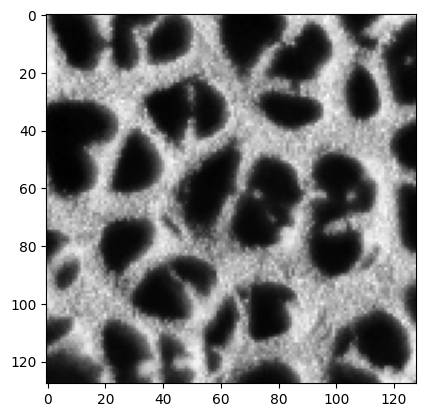

In [6]:
cnt = 0
for i in dataset.batch(16):
    a = i[0]
    b = i[1]
    c = i[2]
    #d = i[3]

n =  0
print(c[n].numpy())
print(b[n].numpy())
plt.imshow(a[n],cmap='gray')
#plt.imshow(d[n],cmap='gray')
plt.show()

# Modelos

In [7]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [8]:
###_____________________________ENCODER________________________##
latent_dim = 16

nx, ny = 128, 128

encoder_inputs = keras.Input(shape=(nx, ny,1))

x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',name='layer_E1')(encoder_inputs)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',name='layer_E2')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',name='layer_E3')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',name='layer_E4')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',name='layer_E5')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same',name='layer_E6')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same',name='layer_E7')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(4, (3, 3), activation='relu', padding='same',name='layer_E8')(x)
x = layers.Flatten()(x)

z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(inputs=encoder_inputs, outputs=[z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 layer_E1 (Conv2D)           (None, 128, 128, 512)        5120      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 512)          0         ['layer_E1[0][0]']            
 D)                                                                                               
                                                                                                  
 batch_normalization (Batch  (None, 64, 64, 512)          2048      ['max_pooling2d[0][0]'] 

In [9]:
###_____________________________DECODER________________________##
## Entrada Z
latent_inputs = keras.Input(shape=(latent_dim,))

##dimensiones
ndim = 16
nfilts = 128

## anti-flatten de la última capa convolucional
x = layers.Dense(ndim * ndim * nfilts, activation="relu")(latent_inputs)

## Reshape para reconstruir la última convolucional
x = layers.Reshape((ndim,ndim, nfilts))(x)

## Capas convolucionales
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',name='layer_D1')(x)
x = tf.keras.layers.UpSampling2D((1, 1))(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',name='layer_D2')(x)
x = tf.keras.layers.UpSampling2D((1, 1))(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',name='layer_D3')(x)
x = tf.keras.layers.UpSampling2D((1, 1))(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',name='layer_D4')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same',name='layer_D5')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same',name='layer_D6')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(4, (3, 3), activation='relu', padding='same',name='layer_D7')(x)

decoder_outputs = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same',name='layer_D8')(x)

## Construcción del decoder
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 32768)             557056    
                                                                 
 reshape (Reshape)           (None, 16, 16, 128)       0         
                                                                 
 layer_D1 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 up_sampling2d (UpSampling2  (None, 16, 16, 256)       0         
 D)                                                              
                                                                 
 batch_normalization_7 (Bat  (None, 16, 16, 256)       1024      
 chNormalization)                                          

In [10]:
###_____________________________Estimador de valores geométricos________________________##

## Input layer
regressor_inputs = keras.Input(shape=(128,128,1))

## Hidden layers
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',name='layer_R1')(regressor_inputs)
x = layers.MaxPooling2D((2, 2), padding='same',name='layer_R2')(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',name='layer_R3')(x)
x = layers.MaxPooling2D((2, 2), padding='same',name='layer_R4')(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same',name='layer_R5')(x)
x = layers.MaxPooling2D((2, 2), padding='same',name='layer_R6')(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same',name='layer_R7')(x)
x = layers.MaxPooling2D((2, 2), padding='same',name='layer_R8')(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(4, (3, 3), activation='relu', padding='same',name='layer_R9')(x)
x = layers.MaxPooling2D((2, 2), padding='same',name='layer_R10')(x)
x = layers.BatchNormalization()(x)

flatten = layers.Flatten()(x)

## Output_1 layer
regressor_output_area = layers.Dense(1, activation="linear")(flatten)

## Output_2 layer
regressor_output_perimeter = layers.Dense(1, activation="linear")(flatten)

## Output_3 layer
regressor_output_diameter = layers.Dense(1, activation="linear")(flatten)

## Output_4 layer
regressor_output_npores = layers.Dense(1, activation="linear")(flatten)

regressor_outputs = [regressor_output_area,regressor_output_perimeter,regressor_output_diameter,regressor_output_npores]

## regressor model
regressor = keras.Model(regressor_inputs, regressor_outputs, name="regressor")
regressor.summary()

Model: "regressor"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 layer_R1 (Conv2D)           (None, 128, 128, 128)        1280      ['input_3[0][0]']             
                                                                                                  
 layer_R2 (MaxPooling2D)     (None, 64, 64, 128)          0         ['layer_R1[0][0]']            
                                                                                                  
 batch_normalization_13 (Ba  (None, 64, 64, 128)          512       ['layer_R2[0][0]']            
 tchNormalization)                                                                        

In [11]:
##--------------------- Discriminador entre original y sintético ---------------------##
## Input layer
discriminator_inputs = keras.Input(shape=(128,128,1))

## Hidden layers
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',name='layer_D1')(discriminator_inputs)
x = layers.MaxPooling2D((2, 2), padding='same',name='layer_D2')(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',name='layer_D3')(x)
x = layers.MaxPooling2D((2, 2), padding='same',name='layer_D4')(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same',name='layer_D5')(x)
x = layers.MaxPooling2D((2, 2), padding='same',name='layer_D6')(x)
x = layers.BatchNormalization()(x)

flatten = layers.Flatten()(x)

## Output layer
discriminator_output = layers.Dense(1, activation="sigmoid")(flatten)

## discriminator model
discriminator = keras.Model(discriminator_inputs, discriminator_output, name="discriminator")
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 layer_D1 (Conv2D)           (None, 128, 128, 128)     1280      
                                                                 
 layer_D2 (MaxPooling2D)     (None, 64, 64, 128)       0         
                                                                 
 batch_normalization_18 (Ba  (None, 64, 64, 128)       512       
 tchNormalization)                                               
                                                                 
 layer_D3 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 layer_D4 (MaxPooling2D)     (None, 32, 32, 64)        0         
                                                     

In [12]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, regressor, discriminator, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.regressor = regressor
        self.discriminator = discriminator
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")        
        self.estimation_loss_tracker = keras.metrics.Mean(name="estimation_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="disc_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
            self.estimation_loss_tracker,       
            self.disc_loss_tracker,     
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            ## Valores estimados por el encoder
            z_mean, z_log_var, z = self.encoder(data[0])
            
            ## Valores geométricos asociados a los datos
            geometrics_features = data[2]

            ## Reconstrucción del embebido del encoder
            reconstruction = self.decoder(z)            

            ## Reducción de la reconstrucción
            reconstruction /= tf.reduce_max(reconstruction)

            ## Valores estimados apartir del regresor            
            estimations = self.regressor(reconstruction)       
            
            
            ## Error de reconstrucción
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data[0], reconstruction), axis=(1, 2)
                )
            )
            
            
            

            ## Error de discriminación entre original y reconstrucción           
                                
            ## tomar aleatoriamente la origina lo la recosntruida
            img_type = np.random.randint(0,2)
            
            if img_type == 0:
                
                img  = reconstruction
                disc = self.discriminator(img)
                label = tf.zeros_like(disc)
                
                disc_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(label, disc))
                )
            else:
                img = data[0]
                disc = self.discriminator(img)
                label = tf.ones_like(disc)
                
                disc_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(label, disc))
                )
                
            
            

            
            ## Error de estimación de valores geométricos
                        
            estimation_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.mean_squared_error(geometrics_features, estimations), axis=(1)
                )
            )
            
            
            ## Error de divergencia KL
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))              
            
            

            ## Error total          
            total_loss = reconstruction_loss + kl_loss + estimation_loss + disc_loss
        
        ## Actualización de los gradientes
        grads = tape.gradient(total_loss, self.trainable_weights)

        ## Actualización de lA RECONSTRUCCIÓN
        self.reconstruction = reconstruction

        ### Actualización de los pesos
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)   
        self.estimation_loss_tracker.update_state(estimation_loss)  
        self.disc_loss_tracker.update_state(disc_loss)  
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(), 
            "ArithmeticError": self.estimation_loss_tracker.result(),       
            "BinaryError": self.disc_loss_tracker.result(),
        }

In [14]:
vae = VAE(encoder, decoder,regressor,discriminator)
opt = tf.optimizers.Adam(learning_rate = 0.000001)
#nll = lambda x , rv_x: -rv_x.log_prob(x)
vae.compile(optimizer=opt)


vae.fit(dataset.batch(16), epochs=2000, 
                batch_size=16,
                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)])

Epoch 1/2000


2024-07-22 20:09:33.485789: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.00GiB (rounded to 1073741824)requested by op encoder/layer_E1/Relu
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-07-22 20:09:33.485840: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2024-07-22 20:09:33.485948: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 443, Chunks in use: 443. 110.8KiB allocated for chunks. 110.8KiB in use in bin. 37.1KiB client-requested in use in bin.
2024-07-22 20:09:33.485954: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 52, Chunks in use: 52. 26.2KiB allocated for chunks. 26.2KiB in use in bin. 26.0KiB client-requested in use in bin.
2024-07-22 20:09:33.485958: I tenso

ResourceExhaustedError: Graph execution error:

Detected at node encoder/layer_E1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/ipykernel_launcher.py", line 17, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 1046, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 736, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 604, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_1357213/30438964.py", line 7, in <module>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1783, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/tmp/ipykernel_1357213/986656427.py", line 29, in train_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 589, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend.py", line 5397, in relu

OOM when allocating tensor with shape[32,512,128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node encoder/layer_E1/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_32196]

In [ ]:
### Guardar modelohttps://www.tensorflow.org/guide/saved_model?hl=es-419
vae.encoder.save('Models2/weakly_disc_deep_GVAE_encoder_DRY_1_16.h5')
vae.decoder.save('Models2/weakly_disc_deep_GVAE_decoder_DRY_1_16.h5')
vae.regressor.save('Models2/weakly_disc_deep_GVAE_regressor_DRY_1_16.h5')
vae.discriminator.save('Models2/weakly_disc_deep__GVAE_discriminator_DRY_1_16.h5')

## 1 -> todos los factores en 1 y lmda = 0.5
## 2 -> 
## factores
            #betha = 5 ## b-vae
            #lmda = 0.9 # vae percentage
            #gamma = 100 # discriminator
            #alpha = 0.05 # estimation
            
## 3 -> 
## factores
            #betha = 5 ## b-vae
            #lmda = 0.9 # vae percentage
            #gamma = 1000 # discriminator
            #alpha = 0.05 # estimation
            
            
## 4 ->
## factores            
           #lmda = 0.9 # vae percentage
           #gamma = 5000 # discriminator